#### Importowanie bibliotek

In [14]:
import pandas as pd

#### Wczytanie zbioru danych

In [15]:
df = pd.read_csv("Metabolomics_Final_clean_filtered.csv")

#### Policzenie średnich dla grup

In [16]:
# Calculate means for each group, excluding non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
group_means = df.groupby('Group')[numeric_cols].mean()

# Display the results
print("Mean values for each group:")
group_means

Mean values for each group:


,Metabolite1,Metabolite2,Metabolite3,Metabolite4,Metabolite5,Metabolite6,Metabolite7,Metabolite8,Metabolite9,Metabolite10,...,Metabolite490,Metabolite491,Metabolite492,Metabolite493,Metabolite494,Metabolite495,Metabolite496,Metabolite497,Metabolite498,Metabolite499
Group,,,,,,,,,,,,,,,,,,,,,
Blank,2.580988e+09,1.048856e+09,1.025911e+09,2.223840e+07,2.947591e+08,1.976808e+08,4.452100e+08,3.564839e+08,7.600764e+08,7.531663e+08,...,2.992165e+06,2.942727e+06,5.023744e+06,3.658474e+06,4.614303e+06,5.911360e+06,1.795047e+07,1.292263e+06,1.369996e+07,3.671963e+07
F_Control,7.651155e+08,4.567823e+09,5.976636e+09,3.130424e+08,2.170333e+09,2.336127e+09,1.854075e+09,1.366660e+09,3.377590e+09,3.359726e+09,...,2.010523e+07,4.049628e+07,2.699285e+07,2.699285e+07,3.194082e+07,4.129703e+07,4.186998e+07,1.757910e+07,3.232014e+07,1.666710e+07
F_Sample,2.312478e+09,3.959290e+09,5.563670e+09,7.584849e+08,2.442646e+09,2.179313e+09,1.389329e+09,1.979393e+09,3.024980e+09,3.009534e+09,...,2.390196e+07,3.516439e+07,2.654674e+07,2.654676e+07,3.271413e+07,4.334509e+07,4.605622e+07,1.404438e+07,2.431427e+07,1.272059e+07
M_Control,1.961082e+09,3.975922e+09,5.594806e+09,7.720702e+08,2.045288e+09,2.106279e+09,1.865708e+09,1.368587e+09,3.139309e+09,3.123469e+09,...,1.829694e+07,3.301765e+07,3.016886e+07,3.016887e+07,3.256970e+07,4.841810e+07,3.868894e+07,1.051295e+07,2.987615e+07,1.005712e+07
M_Sample,1.186336e+09,2.016342e+09,5.553768e+09,6.299323e+08,1.950342e+09,2.215621e+09,9.307250e+08,1.901036e+09,3.235450e+09,3.216903e+09,...,2.134162e+07,4.012618e+07,3.028556e+07,3.028557e+07,2.999457e+07,4.709051e+07,4.314196e+07,1.140596e+07,2.092983e+07,1.293942e+07
QC,1.485398e+09,3.219571e+09,5.755419e+09,2.408971e+08,2.644978e+09,2.248407e+09,1.088433e+09,1.906385e+09,3.184085e+09,3.158620e+09,...,2.656384e+07,4.347090e+07,2.870698e+07,2.848751e+07,3.663439e+07,4.703160e+07,4.079956e+07,8.323950e+06,2.726768e+07,1.264085e+07


In [25]:
import pandas as pd
import numpy as np

# Get all unique groups
groups = group_means.index.tolist()
total_metabolites = len(group_means.columns)

# Create empty lists to store results
group_pairs = []
differences = []

# Compare each pair of groups
for i in range(len(groups)):
    for j in range(len(groups)):
        if i != j:  # Skip comparing a group to itself
            group1 = groups[i]
            group2 = groups[j]
            
            # Calculate how many metabolites are higher in group1 compared to group2
            diff = group_means.loc[group1] - group_means.loc[group2]
            
            # Store the results
            group_pairs.append(f"{group1} vs {group2}")
            differences.append(diff)

# Create a dataframe with the results
comparison_df = pd.DataFrame({
    'Comparison': group_pairs,
    'Number of higher metabolites': differences
})

# Display the results
print(f"Total metabolites analyzed: {total_metabolites}")
comparison_df


Total metabolites analyzed: 499


,Comparison,Number of higher metabolites
0,Blank vs F_Control,Metabolite1 1.815872e+09 Metabolite2 ...
1,Blank vs F_Sample,Metabolite1 2.685101e+08 Metabolite2 ...
2,Blank vs M_Control,Metabolite1 6.199063e+08 Metabolite2 ...
3,Blank vs M_Sample,Metabolite1 1.394652e+09 Metabolite2 ...
4,Blank vs QC,Metabolite1 1.095590e+09 Metabolite2 ...
5,F_Control vs Blank,Metabolite1 -1.815872e+09 Metabolite2 ...
6,F_Control vs F_Sample,Metabolite1 -1.547362e+09 Metabolite2 ...
7,F_Control vs M_Control,Metabolite1 -1.195966e+09 Metabolite2 ...
8,F_Control vs M_Sample,Metabolite1 -4.212202e+08 Metabolite2 ...
9,F_Control vs QC,Metabolite1 -7.202825e+08 Metabolite2 ...


In [30]:
comparison_df

,Comparison,Number of higher metabolites
0,Blank vs F_Control,Metabolite1 1.815872e+09 Metabolite2 ...
1,Blank vs F_Sample,Metabolite1 2.685101e+08 Metabolite2 ...
2,Blank vs M_Control,Metabolite1 6.199063e+08 Metabolite2 ...
3,Blank vs M_Sample,Metabolite1 1.394652e+09 Metabolite2 ...
4,Blank vs QC,Metabolite1 1.095590e+09 Metabolite2 ...
5,F_Control vs Blank,Metabolite1 -1.815872e+09 Metabolite2 ...
6,F_Control vs F_Sample,Metabolite1 -1.547362e+09 Metabolite2 ...
7,F_Control vs M_Control,Metabolite1 -1.195966e+09 Metabolite2 ...
8,F_Control vs M_Sample,Metabolite1 -4.212202e+08 Metabolite2 ...
9,F_Control vs QC,Metabolite1 -7.202825e+08 Metabolite2 ...


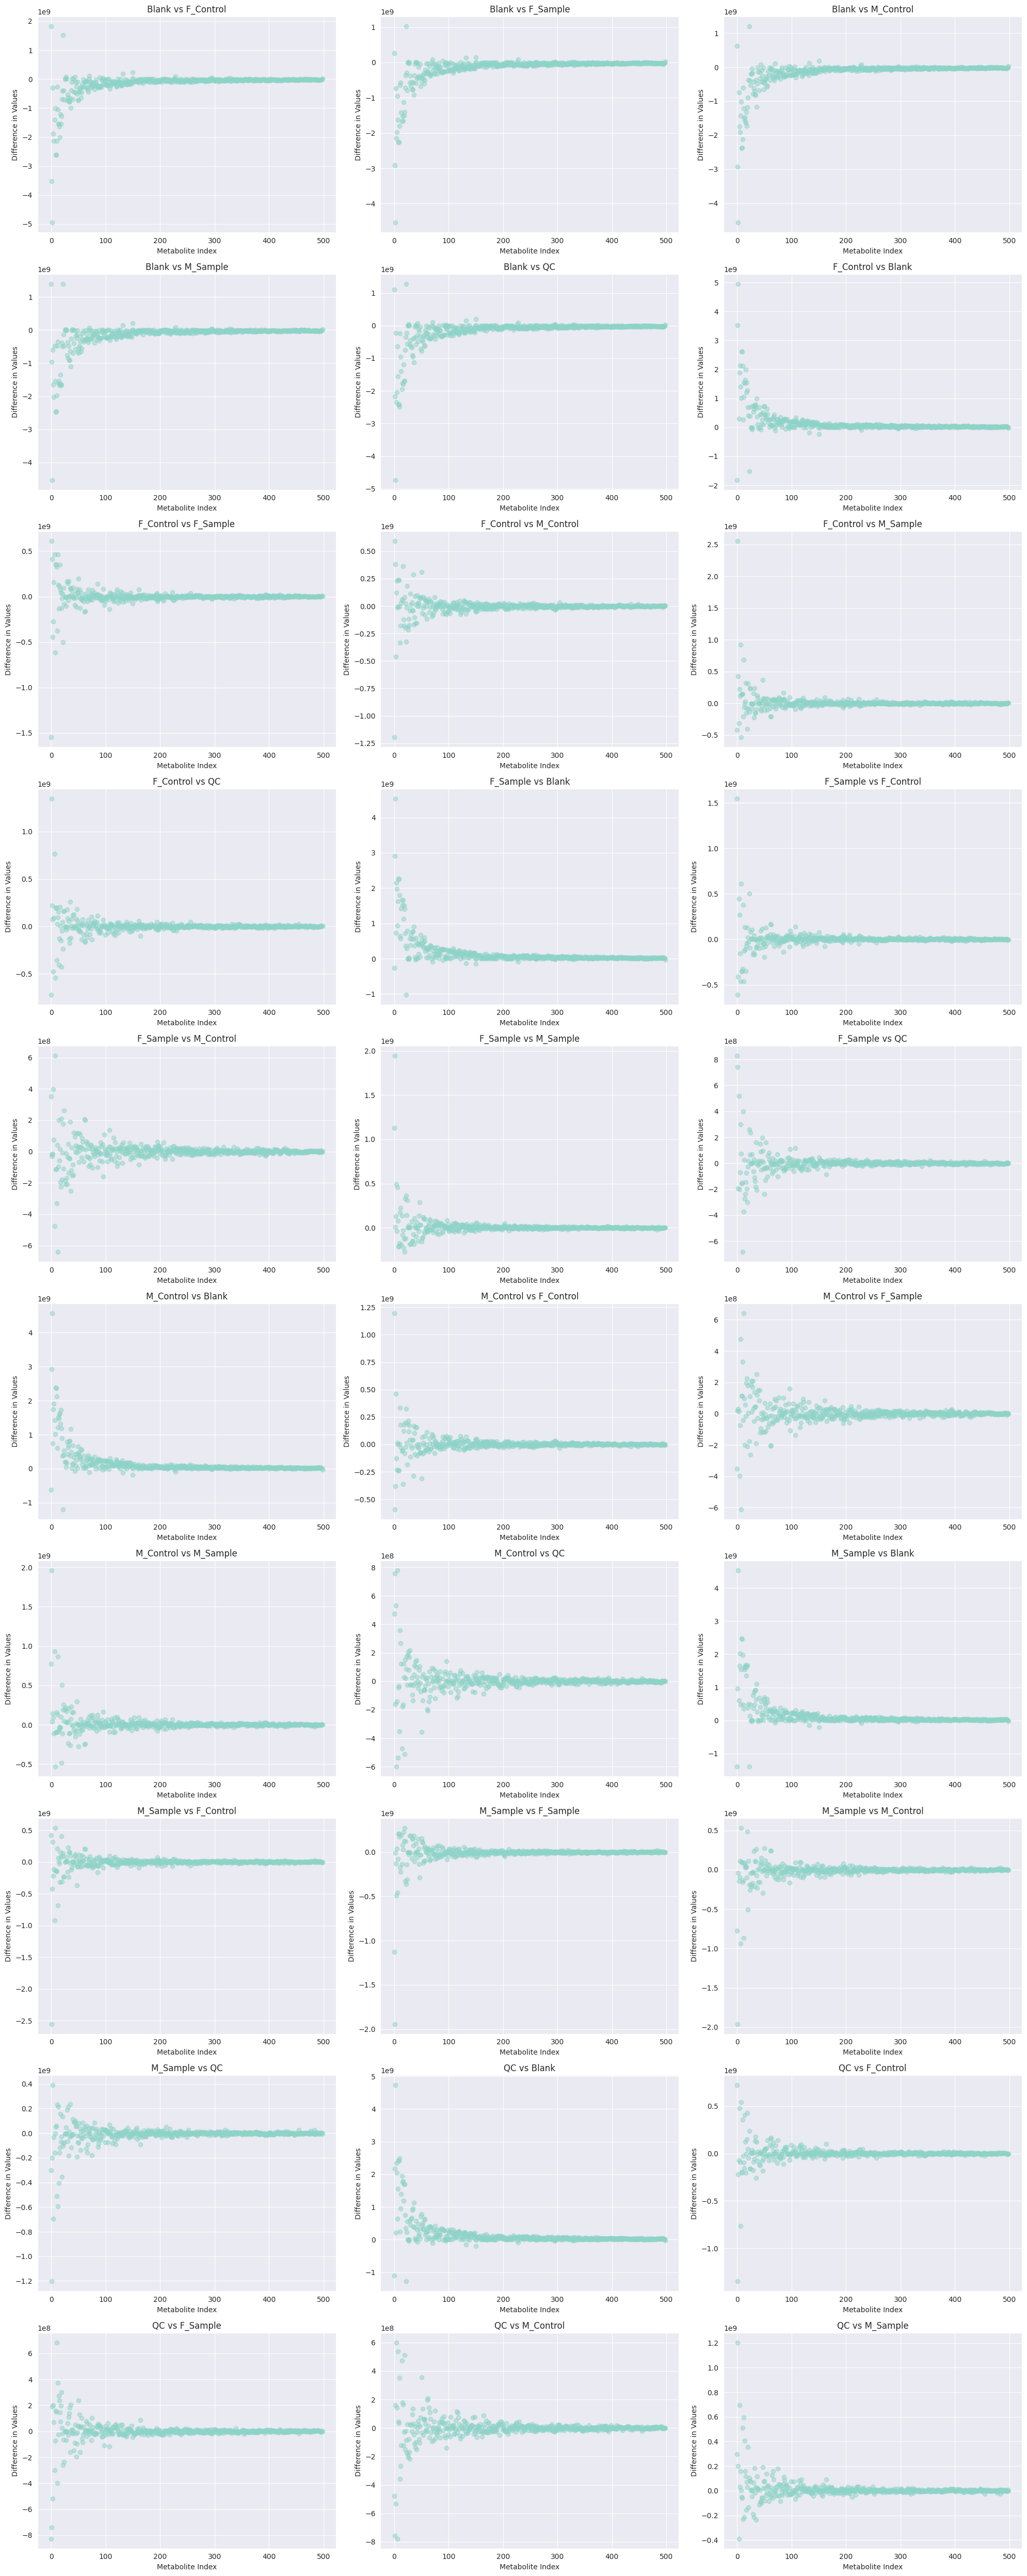

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Calculate how many rows and columns we need for subplots
n_comparisons = len(comparison_df)
n_cols = 3  # You can adjust this number
n_rows = (n_comparisons + n_cols - 1) // n_cols

# Create figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Create scatter plots
for idx in range(len(comparison_df)):
    values = comparison_df.iloc[idx]['Number of higher metabolites']
    axes[idx].scatter(range(len(values)), values, alpha=0.5)
    axes[idx].set_title(comparison_df.iloc[idx]['Comparison'])
    axes[idx].set_xlabel('Metabolite Index')
    axes[idx].set_ylabel('Difference in Values')

# Remove empty subplots if any
for idx in range(len(comparison_df), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()